This notebook is directly from Geron's "Hands-On ML with Scikit-Learn,..."

# Fashion MNIST 

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2022-07-03 16:15:29.147728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-03 16:15:29.147748: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
2.9.0


I had issues setting up my system to run on my gpu so all operations done on cpu

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag",\
              "Ankle Boot"]

## Creating a model using the Sequential API

In [ ]:
# A more procedural approach to defining the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [7]:
# or the this method which is more "functional" by passing a list of layers 
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation = "relu"),
                                 keras.layers.Dense(100, activation = "relu"),
                                 keras.layers.Dense(10, activation = "softmax")
                                ])

2022-07-03 16:15:36.587135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-03 16:15:36.587544: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-03 16:15:36.587624: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-03 16:15:36.587677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-03 16:15:36.587728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# to get model's list of layers
model.layers

In [10]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [11]:
model.get_layer('dense') is hidden1

True

In [12]:
# to access all of the parameters of a layer use its get_weights() method and set_weights() method
#weights, biases = hidden1.get_weights
for layers in model.layers:
    if layers.name != 'dense':
        continue
    weights, biases = layers.get_weights()
    print(f" weights: {weights}")
    print(f" and biases: {biases}")

 weights: [[ 0.0027069  -0.04315769  0.02698044 ... -0.00353927 -0.06910874
   0.04912257]
 [-0.02685474  0.04204109  0.06287596 ... -0.03462392  0.05980404
   0.05131389]
 [ 0.01525588 -0.06778173  0.01899441 ... -0.05171418 -0.07392894
  -0.06758393]
 ...
 [ 0.02349532  0.02579024 -0.07270028 ... -0.05877275  0.07341166
   0.03133643]
 [-0.06236555 -0.04939331 -0.00979082 ...  0.00248311  0.02587985
  -0.0472424 ]
 [-0.05266263 -0.01083685 -0.0672609  ... -0.03892735  0.02996067
   0.03984307]]
 and biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [13]:
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


Once the mdoel is created, you must call its compile() method to specify its loss function

In [14]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics=["accuracy"])

## Training and evaluating the model

In [15]:
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid))
                   # or validation_split = 0.1)

Epoch 1/30
1719/1719 [==============================] - 2s 798us/step - loss: 0.7117 - accuracy: 0.7662 - val_loss: 0.4985 - val_accuracy: 0.8326
Epoch 2/30
1719/1719 [==============================] - 1s 751us/step - loss: 0.4858 - accuracy: 0.8314 - val_loss: 0.4588 - val_accuracy: 0.8418
Epoch 3/30
1719/1719 [==============================] - 1s 753us/step - loss: 0.4404 - accuracy: 0.8459 - val_loss: 0.4079 - val_accuracy: 0.8636
Epoch 4/30
1719/1719 [==============================] - 1s 774us/step - loss: 0.4144 - accuracy: 0.8543 - val_loss: 0.3860 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 1s 756us/step - loss: 0.3915 - accuracy: 0.8623 - val_loss: 0.3938 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 1s 760us/step - loss: 0.3778 - accuracy: 0.8664 - val_loss: 0.3714 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 1s 753us/step - loss: 0.3655 - accuracy: 0.8714 - val_loss: 0.3704 -

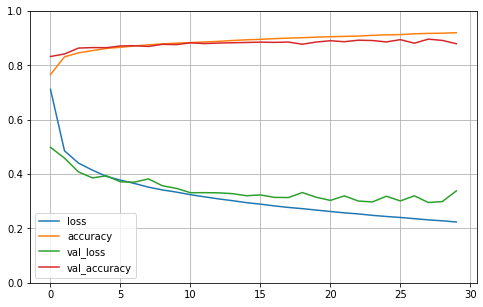

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)  # sets the vertical range to [0-1]
plt.show()

You can call the fit() method again as it doesn't start from scratch, it restarts training right where it left off

## Evaluating on the test set

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 461us/step - loss: 0.3723 - accuracy: 0.8685


[0.3722694516181946, 0.8684999942779541]

## Making Predictions

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 39ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.97, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
import numpy as np

In [26]:
# To just show the class predicted and not all the corresponding probabilities:
y_pred = np.argmax(model.predict(X_new), axis = 1)
y_pred

1/1 [==============================] - 0s 9ms/step


array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')